In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import copy

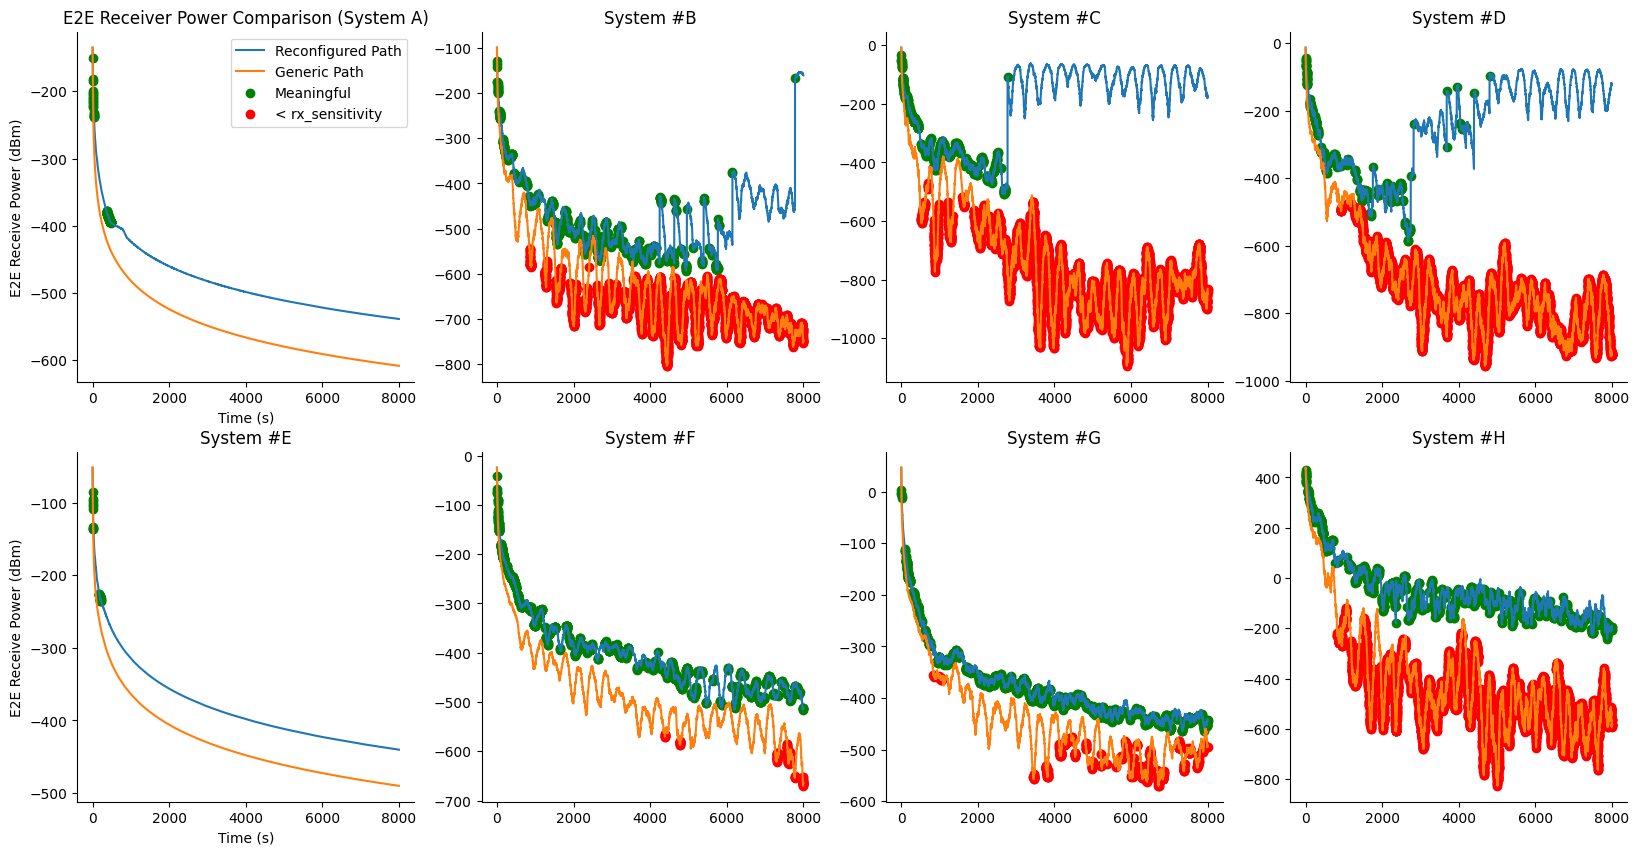

In [24]:
# Dataset
csv_files = ['./csvs/trp_comparison_A.csv', './csvs/trp_comparison_B.csv', './csvs/trp_comparison_C.csv', './csvs/trp_comparison_D.csv', './csvs/trp_comparison_E.csv', './csvs/trp_comparison_F.csv', './csvs/trp_comparison_G.csv', './csvs/trp_comparison_H.csv']

# Grid of 8 figures
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()  # for easy iteration

# Iterate over CSV files
for i, file in enumerate(csv_files):
    # get letter from end of file name
    letter = file[-5]
    data = pd.read_csv(file)
    
    # Determine the number of x/y pairs
    num_pairs = data.shape[1] // 2
    
    # Plot each x/y pair
    for j in range(0, 2):
        x = data.iloc[:, 2*j]
        y = data.iloc[:, 2*j+1]
        
        if j == 0:
            axs[i].plot(x, y, label=f'Reconfigured Path')
        else:
            axs[i].plot(x, y, label=f'Generic Path')
        
        
    axs[i].scatter(data.iloc[:, 4], data.iloc[:, 5], label="Meaningful", color="green")
            
    axs[i].scatter(data.iloc[:, 6], data.iloc[:, 7], label="< rx_sensitivity", color="red")
        
    # Title and labels for the subplot
    if letter == 'A':
        axs[i].set_title(f"E2E Receiver Power Comparison (System {letter})")
    else:
        axs[i].set_title(f"System #{letter}")
        
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)


axs[0].legend()
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('E2E Receive Power (dBm)')
axs[4].set_xlabel('Time (s)')
axs[4].set_ylabel('E2E Receive Power (dBm)')
# Save as a PNG
plt.savefig('plots.png', dpi=400)

# Show the whole thing
plt.show()

7999 7999
7999 7999


IndexError: index 7998 is out of bounds for axis 0 with size 8

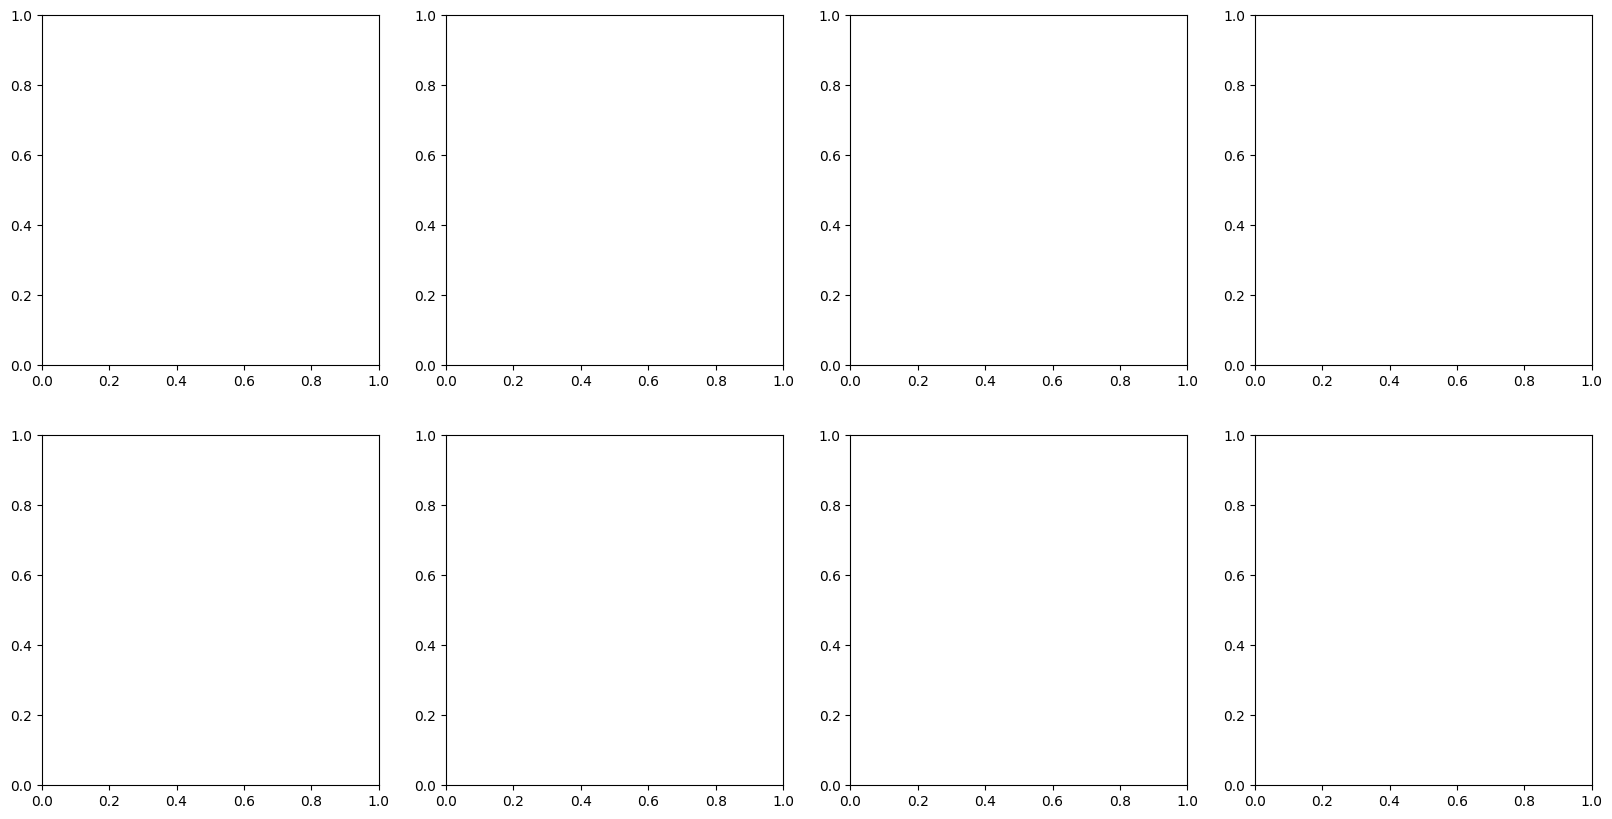

In [ ]:
# Dataset
csv_files = ['./csvs/dr_comparison_A.csv', './csvs/dr_comparison_B.csv', './csvs/dr_comparison_C.csv', './csvs/dr_comparison_D.csv', './csvs/dr_comparison_E.csv', './csvs/dr_comparison_F.csv', './csvs/dr_comparison_G.csv', './csvs/dr_comparison_H.csv']

# Grid of 8 figures
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
axs = axs.flatten()  # for easy iteration

# Iterate over CSV files
for i, file in enumerate(csv_files):
    # get letter from end of file name
    letter = file[-5]
    data = pd.read_csv(file)
    
    # Determine the number of x/y pairs
    num_pairs = data.shape[1] // 2
    
    threshhold = 100
    
    dr_reconfig_actual = copy.deepcopy(data.iloc[:, 1])
    dr_generic_actual = copy.deepcopy(data.iloc[:, 2])
    
    print(len(dr_reconfig_actual), len(dr_generic_actual))
    
    for i in range(0, len(data.iloc[:, 1])):
        if dr_reconfig_actual[i] > threshhold:
            dr_reconfig_actual[i] = 100

    for i in range(0, len(data.iloc[:, 2])):
        if dr_generic_actual[i] > threshhold:
            dr_generic_actual[i] = 100
            
    print(len(data.iloc[:, 0]), len(dr_generic_actual))
    
    axs[i].plot(data.iloc[:, 0], dr_reconfig_actual, label=f'Reconfigured Path')
    axs[i].plot(data.iloc[:, 0], dr_generic_actual, label=f'Generic Path')
        
    # Title and labels for the subplot
    if letter == 'A':
        axs[i].set_title(f"Data Rate Comparison (System #{letter})")
    else:
        axs[i].set_title(f"System #{letter}")
        
    # axs[i].set_ylim(0, 110)
        
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)


axs[0].legend()
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Min. Data Rate (Mbps)')
axs[4].set_xlabel('Time (s)')
axs[4].set_ylabel('Min. Data Rate (Mbps)')
# Save as a PNG
plt.savefig('plots.png', dpi=400)

# Show the whole thing
plt.show()